In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
data=pd.read_csv('dataset.csv')

In [3]:
data.head()

,Day_of_Week,Road_Type,Speed_limit,Weather_Conditions,Light_Conditions,Road_Surface_Conditions,Target
0,4,7,30,7,7,2,0
1,3,6,20,7,1,3,0
2,2,1,40,6,5,3,0
3,4,6,40,6,6,3,0
4,2,7,60,2,4,5,0


In [4]:
data0=data[data['Target']==0]
data1=data[data['Target']==1]

In [5]:
dow=list(set(data['Day_of_Week']))
rt=list(set(data['Road_Type']))
sl=list(set(data['Speed_limit']))
lc=list(set(data['Light_Conditions']))
wc=list(set(data['Weather_Conditions']))
rsc=list(set(data['Road_Surface_Conditions']))
dow.sort()
rt.sort()
sl.sort()
lc.sort()
wc.sort()
rsc.sort()
dowC0,dowC1=[],[]
for x in dow:
    dowC0.append(list(data0['Day_of_Week']).count(x))
    dowC1.append(list(data1['Day_of_Week']).count(x))
rtC0,rtC1=[],[]
for x in rt:
    rtC0.append(list(data0['Road_Type']).count(x))
    rtC1.append(list(data1['Road_Type']).count(x))
slC0,slC1=[],[]
for x in sl:
    slC0.append(list(data0['Speed_limit']).count(x))
    slC1.append(list(data1['Speed_limit']).count(x))
lcC0,lcC1=[],[]
for x in lc:
    lcC0.append(list(data0['Light_Conditions']).count(x))
    lcC1.append(list(data1['Light_Conditions']).count(x))
wcC0,wcC1=[],[]
for x in wc:
    wcC0.append(list(data0['Weather_Conditions']).count(x))
    wcC1.append(list(data1['Weather_Conditions']).count(x))
rscC0,rscC1=[],[]
for x in rsc:
    rscC0.append(list(data0['Road_Surface_Conditions']).count(x))
    rscC1.append(list(data1['Road_Surface_Conditions']).count(x))

In [6]:
dowcode={
    1:'Sunday',
    2:'Monday',
    3:'Tuesday',
    4:'Wednusday',
    5:'Thursday',
    6:'Friday',
    7:'Saturday'
}
rtcode={
    1:'Round About',
    2:'One Way Street',
    3:'Dual Carriageway',
    6:'Single Carriageway',
    7:'Slip Road'
}
lccode={
    1:'Day Light',
    4:'Darkness Lights Lit',
    5:'Darkness Lights Unlit',
    6:'Darkness No Lighting',
    7:'Darkness Lighting Unknown'
}
wccode={
    1:'Fine without high winds',
    2:'Raining without high winds',
    3:'Snowing without high winds',
    4:'Fine with high winds',
    5:'Raining with high winds',
    6:'Snowing with high winds',
    7:'Snow or Mist'
}
rsccode={
    1:'Dry',
    2:'Wet/Damp',
    3:'Snow',
    4:'Ice',
    5:'Flood'
}

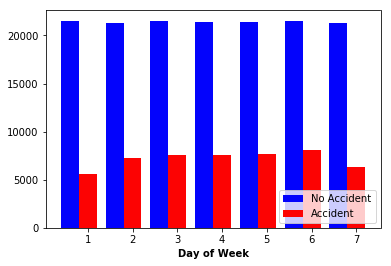

In [7]:
r1 = np.arange(len(dow))
r2 = [x + 0.4 for x in r1]
plt.bar(r1, dowC0, color='#0303fc',width=0.4)
plt.bar(r2, dowC1, color='#fc0303',width=0.4)
plt.xlabel('Day of Week', fontweight='bold')
plt.xticks([r + 0.4 for r in range(len(dow))], dow)
plt.legend(('No Accident','Accident'),loc='lower right')
plt.show()

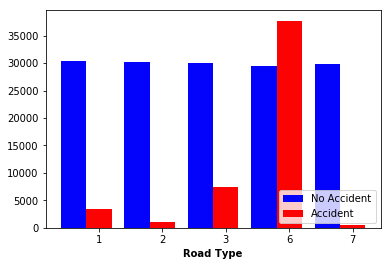

In [8]:
r1 = np.arange(len(rt))
r2 = [x + 0.4 for x in r1]
plt.bar(r1, rtC0, color='#0303fc',width=0.4)
plt.bar(r2, rtC1, color='#fc0303',width=0.4)
plt.xlabel('Road Type', fontweight='bold')
plt.xticks([r + 0.4 for r in range(len(rt))], rt)
plt.legend(('No Accident','Accident'),loc='lower right')
plt.show()

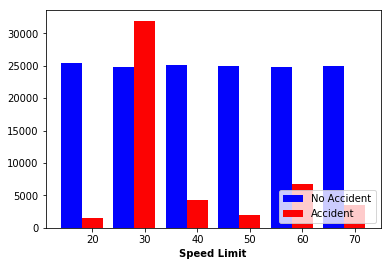

In [9]:
r1 = np.arange(len(sl))
r2 = [x + 0.4 for x in r1]
plt.bar(r1, slC0, color='#0303fc',width=0.4)
plt.bar(r2, slC1, color='#fc0303',width=0.4)
plt.xlabel('Speed Limit', fontweight='bold')
plt.xticks([r + 0.4 for r in range(len(sl))], sl)
plt.legend(('No Accident','Accident'),loc='lower right')
plt.show()

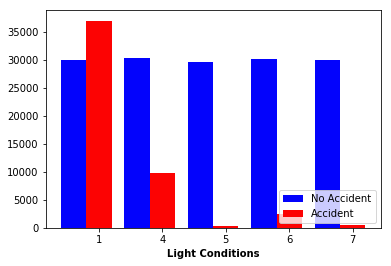

In [10]:
r1 = np.arange(len(lc))
r2 = [x + 0.4 for x in r1]
plt.bar(r1, lcC0, color='#0303fc',width=0.4)
plt.bar(r2, lcC1, color='#fc0303',width=0.4)
plt.xlabel('Light Conditions', fontweight='bold')
plt.xticks([r + 0.4 for r in range(len(lc))], lc)
plt.legend(('No Accident','Accident'),loc='lower right')
plt.show()

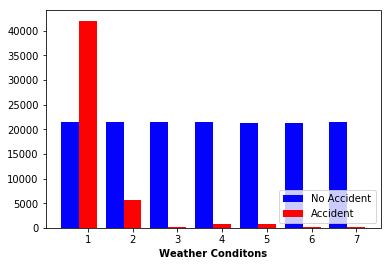

In [11]:
r1 = np.arange(len(wc))
r2 = [x + 0.4 for x in r1]
plt.bar(r1, wcC0, color='#0303fc',width=0.4)
plt.bar(r2, wcC1, color='#fc0303',width=0.4)
plt.xlabel('Weather Conditons', fontweight='bold')
plt.xticks([r + 0.4 for r in range(len(wc))], wc)
plt.legend(('No Accident','Accident'),loc='lower right')
plt.show()

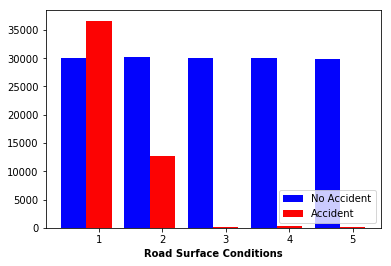

In [12]:
r1 = np.arange(len(rsc))
r2 = [x + 0.4 for x in r1]
plt.bar(r1, rscC0, color='#0303fc',width=0.4)
plt.bar(r2, rscC1, color='#fc0303',width=0.4)
plt.xlabel('Road Surface Conditions', fontweight='bold')
plt.xticks([r + 0.4 for r in range(len(rsc))], rsc)
plt.legend(('No Accident','Accident'),loc='lower right')
plt.show()

In [13]:
X=data.drop('Target',axis=1)
Y=data['Target']

In [14]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y)

In [15]:
logregmodel=LogisticRegression().fit(X_train,Y_train)
print(logregmodel.score(X,Y))
Y_pred = logregmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.930915
0.93106


In [20]:
knnmodel=KNeighborsClassifier(n_neighbors = 2).fit(X_train,Y_train)
print(knnmodel.score(X,Y))
Y_pred = knnmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.96146
0.95786


In [17]:
svmmodel=SVC().fit(X_train,Y_train)
print(svmmodel.score(X,Y))
Y_pred = svmmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.966345
0.96508


In [18]:
nbmodel=GaussianNB().fit(X_train,Y_train)
print(nbmodel.score(X,Y))
Y_pred = nbmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.93315
0.9329


In [19]:
dtmodel=DecisionTreeClassifier(max_depth=3,random_state=0).fit(X_train,Y_train)
print(dtmodel.score(X,Y))
Y_pred = dtmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.92939
0.92922
